In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [3]:
from keras.datasets import cifar10
import numpy as np
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data() 

 33054720/170498071 [====>.........................] - ETA: 3:07

 95952896/170498071 [===============>..............] - ETA: 2:05

142925824/170498071 [========================>.....] - ETA: 55s

170500096/170498071 [==============================] - 339s 2us/step


In [0]:
#print(np.shape(train_features))
#XTrain = np.concatenate(train_features, test_features, axis=0)
#print(np.shape(XTrain))

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [6]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [7]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [8]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

history_1 = []
for train, test in kfold.split(train_set_X, train_set_Y):
  history_1.append(model.fit(train_set_X[train], encoded_train_Y[train], batch_size = 100, epochs = 100, validation_data = (train_set_X[test], encoded_train_Y[test])))

Train on 33330 samples, validate on 16670 samples
Epoch 1/100
33330/33330 [==============================] - 10s 299us/step - loss: 2.0206 - acc: 0.2662 - val_loss: 2.2709 - val_acc: 0.1980
Epoch 2/100
33330/33330 [==============================] - 8s 241us/step - loss: 1.8006 - acc: 0.3505 - val_loss: 1.7625 - val_acc: 0.3569
Epoch 3/100
 5200/33330 [===>..........................] - ETA: 5s - loss: 1.7390 - acc: 0.3765

33330/33330 [==============================] - 8s 241us/step - loss: 1.7074 - acc: 0.3854 - val_loss: 1.7882 - val_acc: 0.3332
Epoch 4/100
33330/33330 [==============================] - 8s 241us/step - loss: 1.6332 - acc: 0.4128 - val_loss: 1.6674 - val_acc: 0.3911
Epoch 5/100
33330/33330 [==============================] - 8s 237us/step - loss: 1.5768 - acc: 0.4327 - val_loss: 1.6357 - val_acc: 0.4017
Epoch 6/100
15100/33330 [============>.................] - ETA: 3s - loss: 1.5434 - acc: 0.4452

33330/33330 [==============================] - 8s 237us/step - loss: 1.5342 - acc: 0.4497 - val_loss: 1.7123 - val_acc: 0.3997
Epoch 7/100
33330/33330 [==============================] - 8s 237us/step - loss: 1.4956 - acc: 0.4606 - val_loss: 1.4926 - val_acc: 0.4671
Epoch 8/100
33330/33330 [==============================] - 8s 240us/step - loss: 1.4594 - acc: 0.4770 - val_loss: 1.5817 - val_acc: 0.4247
Epoch 9/100
16900/33330 [==============>...............] - ETA: 3s - loss: 1.4283 - acc: 0.4908

33330/33330 [==============================] - 8s 238us/step - loss: 1.4268 - acc: 0.4888 - val_loss: 1.4943 - val_acc: 0.4633
Epoch 10/100
33330/33330 [==============================] - 8s 239us/step - loss: 1.3988 - acc: 0.5013 - val_loss: 1.5929 - val_acc: 0.4214
Epoch 11/100
33330/33330 [==============================] - 8s 240us/step - loss: 1.3684 - acc: 0.5127 - val_loss: 1.5068 - val_acc: 0.4626
Epoch 12/100
16800/33330 [==============>...............] - ETA: 3s - loss: 1.3539 - acc: 0.5241

33330/33330 [==============================] - 8s 239us/step - loss: 1.3443 - acc: 0.5235 - val_loss: 1.4437 - val_acc: 0.4869
Epoch 13/100
33330/33330 [==============================] - 8s 237us/step - loss: 1.3200 - acc: 0.5316 - val_loss: 1.4556 - val_acc: 0.4774
Epoch 14/100
33330/33330 [==============================] - 8s 240us/step - loss: 1.3028 - acc: 0.5394 - val_loss: 1.7371 - val_acc: 0.3962
Epoch 15/100
16800/33330 [==============>...............] - ETA: 3s - loss: 1.2811 - acc: 0.5460

33330/33330 [==============================] - 8s 237us/step - loss: 1.2816 - acc: 0.5465 - val_loss: 1.4183 - val_acc: 0.5039
Epoch 16/100
33330/33330 [==============================] - 8s 238us/step - loss: 1.2580 - acc: 0.5542 - val_loss: 1.6085 - val_acc: 0.4538
Epoch 17/100
33330/33330 [==============================] - 8s 238us/step - loss: 1.2439 - acc: 0.5618 - val_loss: 1.3604 - val_acc: 0.5137
Epoch 18/100
16500/33330 [=============>................] - ETA: 3s - loss: 1.2163 - acc: 0.5712

33330/33330 [==============================] - 8s 242us/step - loss: 1.2222 - acc: 0.5696 - val_loss: 1.5155 - val_acc: 0.4762
Epoch 19/100
33330/33330 [==============================] - 8s 242us/step - loss: 1.2013 - acc: 0.5782 - val_loss: 1.5373 - val_acc: 0.4581
Epoch 20/100
33330/33330 [==============================] - 8s 240us/step - loss: 1.1860 - acc: 0.5833 - val_loss: 1.7450 - val_acc: 0.4458
Epoch 21/100
16200/33330 [=============>................] - ETA: 3s - loss: 1.1732 - acc: 0.5848

33330/33330 [==============================] - 8s 240us/step - loss: 1.1715 - acc: 0.5879 - val_loss: 1.3213 - val_acc: 0.5384
Epoch 22/100
33330/33330 [==============================] - 8s 242us/step - loss: 1.1507 - acc: 0.5944 - val_loss: 1.4135 - val_acc: 0.5039
Epoch 23/100
33330/33330 [==============================] - 8s 244us/step - loss: 1.1335 - acc: 0.6024 - val_loss: 1.3707 - val_acc: 0.5278
Epoch 24/100
16600/33330 [=============>................] - ETA: 3s - loss: 1.1343 - acc: 0.6002

33330/33330 [==============================] - 8s 241us/step - loss: 1.1261 - acc: 0.6040 - val_loss: 1.3487 - val_acc: 0.5370
Epoch 25/100
33330/33330 [==============================] - 8s 245us/step - loss: 1.1098 - acc: 0.6092 - val_loss: 1.6785 - val_acc: 0.4530
Epoch 26/100
33330/33330 [==============================] - 8s 242us/step - loss: 1.0926 - acc: 0.6168 - val_loss: 1.3654 - val_acc: 0.5166
Epoch 27/100
16600/33330 [=============>................] - ETA: 3s - loss: 1.0721 - acc: 0.6223

33330/33330 [==============================] - 8s 241us/step - loss: 1.0741 - acc: 0.6245 - val_loss: 1.5915 - val_acc: 0.4734
Epoch 28/100
33330/33330 [==============================] - 8s 251us/step - loss: 1.0667 - acc: 0.6257 - val_loss: 1.3710 - val_acc: 0.5347
Epoch 29/100
33330/33330 [==============================] - 8s 245us/step - loss: 1.0504 - acc: 0.6322 - val_loss: 1.5182 - val_acc: 0.4943
Epoch 30/100
16200/33330 [=============>................] - ETA: 3s - loss: 1.0481 - acc: 0.6343

33330/33330 [==============================] - 8s 245us/step - loss: 1.0436 - acc: 0.6361 - val_loss: 1.3209 - val_acc: 0.5482
Epoch 31/100
33330/33330 [==============================] - 8s 243us/step - loss: 1.0300 - acc: 0.6411 - val_loss: 1.2129 - val_acc: 0.5823
Epoch 32/100
33330/33330 [==============================] - 8s 243us/step - loss: 1.0084 - acc: 0.6449 - val_loss: 1.3379 - val_acc: 0.5419
Epoch 33/100
16600/33330 [=============>................] - ETA: 3s - loss: 0.9953 - acc: 0.6537

33330/33330 [==============================] - 8s 243us/step - loss: 1.0002 - acc: 0.6500 - val_loss: 1.2217 - val_acc: 0.5819
Epoch 34/100
33330/33330 [==============================] - 8s 245us/step - loss: 0.9917 - acc: 0.6521 - val_loss: 1.2677 - val_acc: 0.5690
Epoch 35/100
33330/33330 [==============================] - 8s 241us/step - loss: 0.9796 - acc: 0.6577 - val_loss: 1.2624 - val_acc: 0.5630
Epoch 36/100
16900/33330 [==============>...............] - ETA: 3s - loss: 0.9669 - acc: 0.6620

33330/33330 [==============================] - 8s 244us/step - loss: 0.9676 - acc: 0.6596 - val_loss: 1.2455 - val_acc: 0.5713
Epoch 37/100
33330/33330 [==============================] - 8s 243us/step - loss: 0.9526 - acc: 0.6662 - val_loss: 1.2081 - val_acc: 0.5874
Epoch 38/100
33330/33330 [==============================] - 8s 245us/step - loss: 0.9423 - acc: 0.6718 - val_loss: 1.2493 - val_acc: 0.5788
Epoch 39/100
16900/33330 [==============>...............] - ETA: 3s - loss: 0.9286 - acc: 0.6759

33330/33330 [==============================] - 8s 239us/step - loss: 0.9288 - acc: 0.6766 - val_loss: 1.3568 - val_acc: 0.5475
Epoch 40/100
33330/33330 [==============================] - 8s 243us/step - loss: 0.9166 - acc: 0.6803 - val_loss: 1.2563 - val_acc: 0.5728
Epoch 41/100
33330/33330 [==============================] - 8s 242us/step - loss: 0.9083 - acc: 0.6835 - val_loss: 1.2021 - val_acc: 0.5902
Epoch 42/100
16900/33330 [==============>...............] - ETA: 3s - loss: 0.8913 - acc: 0.6927

33330/33330 [==============================] - 8s 244us/step - loss: 0.8968 - acc: 0.6899 - val_loss: 1.2516 - val_acc: 0.5747
Epoch 43/100
33330/33330 [==============================] - 8s 240us/step - loss: 0.8876 - acc: 0.6918 - val_loss: 1.2693 - val_acc: 0.5723
Epoch 44/100
33330/33330 [==============================] - 8s 243us/step - loss: 0.8758 - acc: 0.6949 - val_loss: 1.2409 - val_acc: 0.5783
Epoch 45/100
17200/33330 [==============>...............] - ETA: 3s - loss: 0.8596 - acc: 0.6992

33330/33330 [==============================] - 8s 243us/step - loss: 0.8673 - acc: 0.6963 - val_loss: 1.2891 - val_acc: 0.5659
Epoch 46/100
33330/33330 [==============================] - 8s 242us/step - loss: 0.8534 - acc: 0.7031 - val_loss: 1.6640 - val_acc: 0.4984
Epoch 47/100
33330/33330 [==============================] - 8s 243us/step - loss: 0.8486 - acc: 0.7043 - val_loss: 1.3471 - val_acc: 0.5529
Epoch 48/100
17200/33330 [==============>...............] - ETA: 3s - loss: 0.8231 - acc: 0.7138

33330/33330 [==============================] - 8s 240us/step - loss: 0.8291 - acc: 0.7119 - val_loss: 1.3154 - val_acc: 0.5696
Epoch 49/100
33330/33330 [==============================] - 8s 240us/step - loss: 0.8284 - acc: 0.7130 - val_loss: 1.2601 - val_acc: 0.5813
Epoch 50/100
33330/33330 [==============================] - 8s 243us/step - loss: 0.8111 - acc: 0.7166 - val_loss: 1.2141 - val_acc: 0.6005
Epoch 51/100
17200/33330 [==============>...............] - ETA: 3s - loss: 0.7933 - acc: 0.7233

33330/33330 [==============================] - 8s 242us/step - loss: 0.8055 - acc: 0.7198 - val_loss: 1.4875 - val_acc: 0.5356
Epoch 52/100
33330/33330 [==============================] - 8s 241us/step - loss: 0.7884 - acc: 0.7265 - val_loss: 1.3857 - val_acc: 0.5543
Epoch 53/100
33330/33330 [==============================] - 9s 260us/step - loss: 0.7786 - acc: 0.7300 - val_loss: 1.3643 - val_acc: 0.5597
Epoch 54/100
15200/33330 [============>.................] - ETA: 3s - loss: 0.7647 - acc: 0.7355

33330/33330 [==============================] - 9s 256us/step - loss: 0.7726 - acc: 0.7329 - val_loss: 1.2828 - val_acc: 0.5850
Epoch 55/100
33330/33330 [==============================] - 8s 244us/step - loss: 0.7655 - acc: 0.7349 - val_loss: 1.3828 - val_acc: 0.5593
Epoch 56/100
33330/33330 [==============================] - 9s 263us/step - loss: 0.7541 - acc: 0.7392 - val_loss: 1.2980 - val_acc: 0.5916
Epoch 57/100
 9500/33330 [=======>......................] - ETA: 8s - loss: 0.7339 - acc: 0.7494

33330/33330 [==============================] - 15s 444us/step - loss: 0.7449 - acc: 0.7405 - val_loss: 1.2878 - val_acc: 0.5867
Epoch 58/100
33330/33330 [==============================] - 15s 448us/step - loss: 0.7362 - acc: 0.7433 - val_loss: 1.3047 - val_acc: 0.5852
Epoch 59/100
27400/33330 [=======================>......] - ETA: 2s - loss: 0.7170 - acc: 0.7519

33330/33330 [==============================] - 15s 450us/step - loss: 0.7158 - acc: 0.7521 - val_loss: 1.3379 - val_acc: 0.5786
Epoch 60/100
33330/33330 [==============================] - 15s 448us/step - loss: 0.7146 - acc: 0.7524 - val_loss: 1.2765 - val_acc: 0.5893
Epoch 61/100
31600/33330 [===========================>..] - ETA: 0s - loss: 0.7027 - acc: 0.7552

33330/33330 [==============================] - 15s 444us/step - loss: 0.7059 - acc: 0.7536 - val_loss: 1.3952 - val_acc: 0.5579
Epoch 62/100
33330/33330 [==============================] - 15s 458us/step - loss: 0.6975 - acc: 0.7584 - val_loss: 1.4163 - val_acc: 0.5741
Epoch 63/100
32900/33330 [============================>.] - ETA: 0s - loss: 0.6814 - acc: 0.7633

33330/33330 [==============================] - 15s 449us/step - loss: 0.6820 - acc: 0.7629 - val_loss: 1.4360 - val_acc: 0.5653
Epoch 64/100
33330/33330 [==============================] - 15s 444us/step - loss: 0.6689 - acc: 0.7673 - val_loss: 1.3084 - val_acc: 0.5954
Epoch 65/100
33330/33330 [==============================] - 15s 454us/step - loss: 0.6646 - acc: 0.7699 - val_loss: 1.3687 - val_acc: 0.5803


Epoch 66/100
33330/33330 [==============================] - 15s 442us/step - loss: 0.6533 - acc: 0.7756 - val_loss: 1.3401 - val_acc: 0.5857
Epoch 67/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.6356 - acc: 0.7814 - val_loss: 1.3382 - val_acc: 0.5947
Epoch 68/100
22700/33330 [===================>..........] - ETA: 4s - loss: 0.6301 - acc: 0.7811

33330/33330 [==============================] - 15s 454us/step - loss: 0.6359 - acc: 0.7802 - val_loss: 1.4038 - val_acc: 0.5771
Epoch 69/100
33330/33330 [==============================] - 15s 449us/step - loss: 0.6211 - acc: 0.7860 - val_loss: 1.4756 - val_acc: 0.5690
Epoch 70/100
30300/33330 [==========================>...] - ETA: 1s - loss: 0.6080 - acc: 0.7875

33330/33330 [==============================] - 15s 451us/step - loss: 0.6121 - acc: 0.7861 - val_loss: 1.3292 - val_acc: 0.5936
Epoch 71/100
33330/33330 [==============================] - 15s 452us/step - loss: 0.6068 - acc: 0.7887 - val_loss: 1.3566 - val_acc: 0.5889
Epoch 72/100
32300/33330 [============================>.] - ETA: 0s - loss: 0.6058 - acc: 0.7897

33330/33330 [==============================] - 15s 449us/step - loss: 0.6055 - acc: 0.7896 - val_loss: 1.4377 - val_acc: 0.5779
Epoch 73/100
33330/33330 [==============================] - 15s 456us/step - loss: 0.5898 - acc: 0.7959 - val_loss: 1.4004 - val_acc: 0.5895
Epoch 74/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.5799 - acc: 0.7994

33330/33330 [==============================] - 15s 455us/step - loss: 0.5801 - acc: 0.7994 - val_loss: 1.3399 - val_acc: 0.6021
Epoch 75/100
33330/33330 [==============================] - 15s 445us/step - loss: 0.5660 - acc: 0.8044 - val_loss: 1.3542 - val_acc: 0.5983
Epoch 76/100
32700/33330 [============================>.] - ETA: 0s - loss: 0.5559 - acc: 0.8076

33330/33330 [==============================] - 15s 452us/step - loss: 0.5547 - acc: 0.8083 - val_loss: 1.3636 - val_acc: 0.6014
Epoch 77/100
33330/33330 [==============================] - 15s 448us/step - loss: 0.5506 - acc: 0.8088 - val_loss: 1.5271 - val_acc: 0.5773
Epoch 78/100
33200/33330 [============================>.] - ETA: 0s - loss: 0.5469 - acc: 0.8109

33330/33330 [==============================] - 15s 449us/step - loss: 0.5473 - acc: 0.8108 - val_loss: 1.5066 - val_acc: 0.5692
Epoch 79/100
33330/33330 [==============================] - 15s 448us/step - loss: 0.5383 - acc: 0.8151 - val_loss: 1.3727 - val_acc: 0.6010
Epoch 80/100
33300/33330 [============================>.] - ETA: 0s - loss: 0.5266 - acc: 0.8178

33330/33330 [==============================] - 15s 452us/step - loss: 0.5265 - acc: 0.8178 - val_loss: 1.4980 - val_acc: 0.5831
Epoch 81/100
33330/33330 [==============================] - 15s 442us/step - loss: 0.5135 - acc: 0.8236 - val_loss: 1.5364 - val_acc: 0.5731
Epoch 82/100
33200/33330 [============================>.] - ETA: 0s - loss: 0.5090 - acc: 0.8238

33330/33330 [==============================] - 15s 449us/step - loss: 0.5087 - acc: 0.8238 - val_loss: 1.5819 - val_acc: 0.5753
Epoch 83/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.5004 - acc: 0.8281 - val_loss: 1.5803 - val_acc: 0.5742
Epoch 84/100
33330/33330 [==============================] - 15s 454us/step - loss: 0.4764 - acc: 0.8379 - val_loss: 1.4727 - val_acc: 0.5924


Epoch 85/100
33330/33330 [==============================] - 15s 456us/step - loss: 0.4855 - acc: 0.8326 - val_loss: 1.5325 - val_acc: 0.5848
Epoch 86/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.4692 - acc: 0.8383 - val_loss: 1.6915 - val_acc: 0.5597
Epoch 87/100
22500/33330 [===================>..........] - ETA: 4s - loss: 0.4519 - acc: 0.8454

33330/33330 [==============================] - 15s 444us/step - loss: 0.4598 - acc: 0.8430 - val_loss: 1.5484 - val_acc: 0.5855
Epoch 88/100
33330/33330 [==============================] - 15s 453us/step - loss: 0.4507 - acc: 0.8452 - val_loss: 1.4699 - val_acc: 0.5936
Epoch 89/100
31100/33330 [==========================>...] - ETA: 0s - loss: 0.4469 - acc: 0.8467

33330/33330 [==============================] - 15s 439us/step - loss: 0.4468 - acc: 0.8469 - val_loss: 1.5668 - val_acc: 0.5909
Epoch 90/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.4274 - acc: 0.8562 - val_loss: 1.5768 - val_acc: 0.5888
Epoch 91/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.4298 - acc: 0.8532

33330/33330 [==============================] - 15s 440us/step - loss: 0.4301 - acc: 0.8530 - val_loss: 1.5365 - val_acc: 0.5922
Epoch 92/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.4200 - acc: 0.8569 - val_loss: 1.6202 - val_acc: 0.5837
Epoch 93/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.4018 - acc: 0.8626 - val_loss: 1.9868 - val_acc: 0.5470


Epoch 94/100
33330/33330 [==============================] - 15s 446us/step - loss: 0.4020 - acc: 0.8632 - val_loss: 1.6572 - val_acc: 0.5830
Epoch 95/100
33330/33330 [==============================] - 15s 438us/step - loss: 0.4015 - acc: 0.8609 - val_loss: 1.5699 - val_acc: 0.5936
Epoch 96/100
22500/33330 [===================>..........] - ETA: 4s - loss: 0.3793 - acc: 0.8702

33330/33330 [==============================] - 15s 446us/step - loss: 0.3828 - acc: 0.8704 - val_loss: 1.7635 - val_acc: 0.5616
Epoch 97/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.3738 - acc: 0.8737 - val_loss: 1.7366 - val_acc: 0.5800
Epoch 98/100
31000/33330 [==========================>...] - ETA: 0s - loss: 0.3610 - acc: 0.8790

33330/33330 [==============================] - 15s 436us/step - loss: 0.3627 - acc: 0.8781 - val_loss: 1.6741 - val_acc: 0.5883
Epoch 99/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.3713 - acc: 0.8743 - val_loss: 1.6796 - val_acc: 0.5893
Epoch 100/100
32900/33330 [============================>.] - ETA: 0s - loss: 0.3493 - acc: 0.8833

33330/33330 [==============================] - 15s 440us/step - loss: 0.3493 - acc: 0.8831 - val_loss: 2.0100 - val_acc: 0.5557
Train on 33330 samples, validate on 16670 samples
Epoch 1/100
33330/33330 [==============================] - 15s 436us/step - loss: 0.9582 - acc: 0.7105 - val_loss: 0.5679 - val_acc: 0.7916
Epoch 2/100
25700/33330 [======================>.......] - ETA: 2s - loss: 0.8344 - acc: 0.7349

33330/33330 [==============================] - 15s 436us/step - loss: 0.8379 - acc: 0.7354 - val_loss: 0.5310 - val_acc: 0.8076
Epoch 3/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.7892 - acc: 0.7486 - val_loss: 0.5947 - val_acc: 0.7807
Epoch 4/100
31500/33330 [===========================>..] - ETA: 0s - loss: 0.7515 - acc: 0.7582

33330/33330 [==============================] - 14s 434us/step - loss: 0.7524 - acc: 0.7580 - val_loss: 0.6838 - val_acc: 0.7577
Epoch 5/100
33330/33330 [==============================] - 15s 446us/step - loss: 0.7245 - acc: 0.7637 - val_loss: 0.5012 - val_acc: 0.8239
Epoch 6/100
33300/33330 [============================>.] - ETA: 0s - loss: 0.7034 - acc: 0.7723

33330/33330 [==============================] - 15s 438us/step - loss: 0.7034 - acc: 0.7723 - val_loss: 0.5286 - val_acc: 0.8170
Epoch 7/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.6840 - acc: 0.7767 - val_loss: 0.5235 - val_acc: 0.8177
Epoch 8/100
33330/33330 [==============================] - 15s 447us/step - loss: 0.6640 - acc: 0.7844 - val_loss: 0.6941 - val_acc: 0.7516


Epoch 9/100
33330/33330 [==============================] - 14s 435us/step - loss: 0.6428 - acc: 0.7899 - val_loss: 0.8699 - val_acc: 0.6946
Epoch 10/100
33330/33330 [==============================] - 15s 435us/step - loss: 0.6274 - acc: 0.7944 - val_loss: 0.5411 - val_acc: 0.8057
Epoch 11/100
22800/33330 [===================>..........] - ETA: 3s - loss: 0.6038 - acc: 0.8045

33330/33330 [==============================] - 15s 445us/step - loss: 0.6129 - acc: 0.8005 - val_loss: 0.5407 - val_acc: 0.8082
Epoch 12/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.5940 - acc: 0.8048 - val_loss: 0.6451 - val_acc: 0.7660
Epoch 13/100
31100/33330 [==========================>...] - ETA: 0s - loss: 0.5754 - acc: 0.8114

33330/33330 [==============================] - 15s 446us/step - loss: 0.5774 - acc: 0.8107 - val_loss: 0.6481 - val_acc: 0.7663
Epoch 14/100
33330/33330 [==============================] - 15s 442us/step - loss: 0.5669 - acc: 0.8140 - val_loss: 0.6905 - val_acc: 0.7461
Epoch 15/100
32600/33330 [============================>.] - ETA: 0s - loss: 0.5541 - acc: 0.8155

33330/33330 [==============================] - 15s 439us/step - loss: 0.5535 - acc: 0.8160 - val_loss: 0.6831 - val_acc: 0.7575
Epoch 16/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.5412 - acc: 0.8219 - val_loss: 0.6146 - val_acc: 0.7753
Epoch 17/100
33100/33330 [============================>.] - ETA: 0s - loss: 0.5294 - acc: 0.8232

33330/33330 [==============================] - 15s 435us/step - loss: 0.5298 - acc: 0.8231 - val_loss: 0.7332 - val_acc: 0.7358
Epoch 18/100
33330/33330 [==============================] - 15s 442us/step - loss: 0.5140 - acc: 0.8275 - val_loss: 0.9134 - val_acc: 0.6929
Epoch 19/100
33200/33330 [============================>.] - ETA: 0s - loss: 0.5016 - acc: 0.8345

33330/33330 [==============================] - 15s 444us/step - loss: 0.5017 - acc: 0.8345 - val_loss: 0.7588 - val_acc: 0.7391
Epoch 20/100
33330/33330 [==============================] - 14s 433us/step - loss: 0.4931 - acc: 0.8385 - val_loss: 0.6880 - val_acc: 0.7557
Epoch 21/100
33300/33330 [============================>.] - ETA: 0s - loss: 0.4745 - acc: 0.8428

33330/33330 [==============================] - 15s 438us/step - loss: 0.4744 - acc: 0.8428 - val_loss: 0.7865 - val_acc: 0.7320
Epoch 22/100
33330/33330 [==============================] - 15s 444us/step - loss: 0.4672 - acc: 0.8451 - val_loss: 0.8234 - val_acc: 0.7192
Epoch 23/100
33330/33330 [==============================] - 14s 433us/step - loss: 0.4509 - acc: 0.8509 - val_loss: 0.9370 - val_acc: 0.6915


Epoch 24/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.4382 - acc: 0.8556 - val_loss: 0.7412 - val_acc: 0.7426
Epoch 25/100
33330/33330 [==============================] - 15s 446us/step - loss: 0.4270 - acc: 0.8595 - val_loss: 0.6601 - val_acc: 0.7653
Epoch 26/100
22700/33330 [===================>..........] - ETA: 3s - loss: 0.4095 - acc: 0.8662

33330/33330 [==============================] - 15s 440us/step - loss: 0.4156 - acc: 0.8632 - val_loss: 0.6673 - val_acc: 0.7623
Epoch 27/100
33330/33330 [==============================] - 15s 445us/step - loss: 0.4101 - acc: 0.8649 - val_loss: 0.9161 - val_acc: 0.7006
Epoch 28/100
30800/33330 [==========================>...] - ETA: 0s - loss: 0.3990 - acc: 0.8694

33330/33330 [==============================] - 15s 443us/step - loss: 0.3987 - acc: 0.8695 - val_loss: 0.6667 - val_acc: 0.7681
Epoch 29/100
33330/33330 [==============================] - 15s 442us/step - loss: 0.3819 - acc: 0.8763 - val_loss: 0.6870 - val_acc: 0.7611
Epoch 30/100
33300/33330 [============================>.] - ETA: 0s - loss: 0.3766 - acc: 0.8762

33330/33330 [==============================] - 15s 441us/step - loss: 0.3768 - acc: 0.8761 - val_loss: 0.7070 - val_acc: 0.7526
Epoch 31/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.3607 - acc: 0.8824 - val_loss: 0.7448 - val_acc: 0.7488
Epoch 32/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.3548 - acc: 0.8844 - val_loss: 0.7127 - val_acc: 0.7551
Epoch 33/100
  100/33330 [..............................] - ETA: 13s - loss: 0.3379 - acc: 0.8600

33330/33330 [==============================] - 15s 443us/step - loss: 0.3436 - acc: 0.8892 - val_loss: 0.7355 - val_acc: 0.7513
Epoch 34/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.3305 - acc: 0.8923 - val_loss: 0.7241 - val_acc: 0.7611
Epoch 35/100
25200/33330 [=====================>........] - ETA: 3s - loss: 0.3262 - acc: 0.8948

33330/33330 [==============================] - 15s 439us/step - loss: 0.3318 - acc: 0.8929 - val_loss: 0.8159 - val_acc: 0.7359
Epoch 36/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.3182 - acc: 0.8992 - val_loss: 0.7744 - val_acc: 0.7466
Epoch 37/100
31400/33330 [===========================>..] - ETA: 0s - loss: 0.2981 - acc: 0.9048

33330/33330 [==============================] - 14s 435us/step - loss: 0.2983 - acc: 0.9048 - val_loss: 0.7436 - val_acc: 0.7516
Epoch 38/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.2932 - acc: 0.9073 - val_loss: 1.1450 - val_acc: 0.6759
Epoch 39/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.2882 - acc: 0.9086

33330/33330 [==============================] - 15s 442us/step - loss: 0.2879 - acc: 0.9088 - val_loss: 0.7010 - val_acc: 0.7663
Epoch 40/100
33330/33330 [==============================] - 14s 430us/step - loss: 0.2743 - acc: 0.9142 - val_loss: 0.8604 - val_acc: 0.7266
Epoch 41/100
33200/33330 [============================>.] - ETA: 0s - loss: 0.2619 - acc: 0.9195

33330/33330 [==============================] - 14s 430us/step - loss: 0.2626 - acc: 0.9193 - val_loss: 1.1390 - val_acc: 0.6791
Epoch 42/100
33330/33330 [==============================] - 15s 438us/step - loss: 0.2567 - acc: 0.9212 - val_loss: 0.8291 - val_acc: 0.7445
Epoch 43/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.2403 - acc: 0.9264

33330/33330 [==============================] - 14s 432us/step - loss: 0.2402 - acc: 0.9265 - val_loss: 0.9025 - val_acc: 0.7321
Epoch 44/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.2418 - acc: 0.9254 - val_loss: 1.6247 - val_acc: 0.6355
Epoch 45/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.2344 - acc: 0.9284 - val_loss: 0.8417 - val_acc: 0.7473


Epoch 46/100
33330/33330 [==============================] - 14s 434us/step - loss: 0.2179 - acc: 0.9347 - val_loss: 0.8416 - val_acc: 0.7462
Epoch 47/100
33330/33330 [==============================] - 15s 436us/step - loss: 0.2077 - acc: 0.9397 - val_loss: 1.0151 - val_acc: 0.7150
Epoch 48/100
23100/33330 [===================>..........] - ETA: 3s - loss: 0.2006 - acc: 0.9405

33330/33330 [==============================] - 14s 428us/step - loss: 0.2064 - acc: 0.9377 - val_loss: 0.9154 - val_acc: 0.7371
Epoch 49/100
33330/33330 [==============================] - 15s 435us/step - loss: 0.1986 - acc: 0.9419 - val_loss: 1.4387 - val_acc: 0.6603
Epoch 50/100
31200/33330 [===========================>..] - ETA: 0s - loss: 0.2042 - acc: 0.9392

33330/33330 [==============================] - 15s 445us/step - loss: 0.2035 - acc: 0.9389 - val_loss: 0.8747 - val_acc: 0.7399
Epoch 51/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.1820 - acc: 0.9486 - val_loss: 0.9075 - val_acc: 0.7408
Epoch 52/100
31800/33330 [===========================>..] - ETA: 0s - loss: 0.1744 - acc: 0.9517

33330/33330 [==============================] - 14s 433us/step - loss: 0.1730 - acc: 0.9522 - val_loss: 0.8852 - val_acc: 0.7478
Epoch 53/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.1637 - acc: 0.9544 - val_loss: 0.9745 - val_acc: 0.7262
Epoch 54/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.1549 - acc: 0.9575

33330/33330 [==============================] - 14s 432us/step - loss: 0.1554 - acc: 0.9573 - val_loss: 0.9346 - val_acc: 0.7427
Epoch 55/100
33330/33330 [==============================] - 15s 436us/step - loss: 0.1835 - acc: 0.9509 - val_loss: 1.0562 - val_acc: 0.7189
Epoch 56/100
33330/33330 [==============================] - 15s 437us/step - loss: 0.1461 - acc: 0.9603 - val_loss: 1.1857 - val_acc: 0.7085


Epoch 57/100
33330/33330 [==============================] - 14s 430us/step - loss: 0.1344 - acc: 0.9657 - val_loss: 0.9692 - val_acc: 0.7367
Epoch 58/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.1258 - acc: 0.9686 - val_loss: 1.3730 - val_acc: 0.6815
Epoch 59/100
22500/33330 [===================>..........] - ETA: 3s - loss: 0.1155 - acc: 0.9723

33330/33330 [==============================] - 15s 435us/step - loss: 0.1376 - acc: 0.9644 - val_loss: 1.1536 - val_acc: 0.7067
Epoch 60/100
33330/33330 [==============================] - 15s 437us/step - loss: 0.1148 - acc: 0.9727 - val_loss: 1.0514 - val_acc: 0.7297
Epoch 61/100
30900/33330 [==========================>...] - ETA: 0s - loss: 0.1068 - acc: 0.9764

33330/33330 [==============================] - 15s 443us/step - loss: 0.1067 - acc: 0.9764 - val_loss: 0.9807 - val_acc: 0.7439
Epoch 62/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.1442 - acc: 0.9662 - val_loss: 1.0954 - val_acc: 0.7301
Epoch 63/100
33100/33330 [============================>.] - ETA: 0s - loss: 0.1519 - acc: 0.9668

33330/33330 [==============================] - 15s 436us/step - loss: 0.1514 - acc: 0.9669 - val_loss: 1.1520 - val_acc: 0.7185
Epoch 64/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.0970 - acc: 0.9802 - val_loss: 1.0010 - val_acc: 0.7395
Epoch 65/100
33330/33330 [==============================] - 14s 430us/step - loss: 0.0808 - acc: 0.9858 - val_loss: 1.1533 - val_acc: 0.7254


Epoch 66/100
33330/33330 [==============================] - 14s 430us/step - loss: 0.0791 - acc: 0.9857 - val_loss: 0.9966 - val_acc: 0.7463
Epoch 67/100
33330/33330 [==============================] - 15s 438us/step - loss: 0.0884 - acc: 0.9829 - val_loss: 1.0686 - val_acc: 0.7359
Epoch 68/100
22500/33330 [===================>..........] - ETA: 3s - loss: 0.0648 - acc: 0.9907

33330/33330 [==============================] - 14s 433us/step - loss: 0.0669 - acc: 0.9896 - val_loss: 1.1172 - val_acc: 0.7350
Epoch 69/100
33330/33330 [==============================] - 14s 431us/step - loss: 0.0615 - acc: 0.9911 - val_loss: 1.0698 - val_acc: 0.7398
Epoch 70/100
30700/33330 [==========================>...] - ETA: 0s - loss: 0.1411 - acc: 0.9734

33330/33330 [==============================] - 15s 443us/step - loss: 0.1345 - acc: 0.9750 - val_loss: 1.1153 - val_acc: 0.7346
Epoch 71/100
33330/33330 [==============================] - 14s 435us/step - loss: 0.0573 - acc: 0.9926 - val_loss: 1.1793 - val_acc: 0.7283
Epoch 72/100
32700/33330 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9945

33330/33330 [==============================] - 15s 438us/step - loss: 0.0507 - acc: 0.9944 - val_loss: 1.1898 - val_acc: 0.7294
Epoch 73/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.0493 - acc: 0.9947 - val_loss: 1.2026 - val_acc: 0.7287
Epoch 74/100
33000/33330 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9955

33330/33330 [==============================] - 15s 442us/step - loss: 0.0452 - acc: 0.9955 - val_loss: 1.1235 - val_acc: 0.7448
Epoch 75/100
33330/33330 [==============================] - 14s 432us/step - loss: 0.0422 - acc: 0.9957 - val_loss: 1.1353 - val_acc: 0.7410
Epoch 76/100
32900/33330 [============================>.] - ETA: 0s - loss: 0.0383 - acc: 0.9966

33330/33330 [==============================] - 15s 445us/step - loss: 0.0383 - acc: 0.9966 - val_loss: 1.1324 - val_acc: 0.7436
Epoch 77/100
33330/33330 [==============================] - 15s 438us/step - loss: 0.0362 - acc: 0.9973 - val_loss: 1.1890 - val_acc: 0.7392
Epoch 78/100
32500/33330 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9971

33330/33330 [==============================] - 15s 438us/step - loss: 0.0342 - acc: 0.9971 - val_loss: 1.1855 - val_acc: 0.7413
Epoch 79/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.0329 - acc: 0.9975 - val_loss: 1.2067 - val_acc: 0.7398
Epoch 80/100
33200/33330 [============================>.] - ETA: 0s - loss: 0.0307 - acc: 0.9981

33330/33330 [==============================] - 14s 435us/step - loss: 0.0308 - acc: 0.9981 - val_loss: 1.2340 - val_acc: 0.7354
Epoch 81/100
33330/33330 [==============================] - 15s 441us/step - loss: 0.0284 - acc: 0.9984 - val_loss: 1.1980 - val_acc: 0.7452
Epoch 82/100
33100/33330 [============================>.] - ETA: 0s - loss: 0.0264 - acc: 0.9988

33330/33330 [==============================] - 15s 436us/step - loss: 0.0265 - acc: 0.9987 - val_loss: 1.2031 - val_acc: 0.7439
Epoch 83/100
33330/33330 [==============================] - 15s 440us/step - loss: 0.0252 - acc: 0.9987 - val_loss: 1.2296 - val_acc: 0.7418
Epoch 84/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.0240 - acc: 0.9989 - val_loss: 1.2457 - val_acc: 0.7419


Epoch 85/100
33330/33330 [==============================] - 15s 444us/step - loss: 0.0228 - acc: 0.9991 - val_loss: 1.2448 - val_acc: 0.7410
Epoch 86/100
33330/33330 [==============================] - 15s 437us/step - loss: 0.0215 - acc: 0.9993 - val_loss: 1.2742 - val_acc: 0.7400
Epoch 87/100
22700/33330 [===================>..........] - ETA: 3s - loss: 0.0194 - acc: 0.9996

33330/33330 [==============================] - 15s 440us/step - loss: 0.0201 - acc: 0.9994 - val_loss: 1.2971 - val_acc: 0.7389
Epoch 88/100
33330/33330 [==============================] - 15s 437us/step - loss: 0.0195 - acc: 0.9994 - val_loss: 1.2731 - val_acc: 0.7421
Epoch 89/100
31000/33330 [==========================>...] - ETA: 0s - loss: 0.0183 - acc: 0.9995

33330/33330 [==============================] - 15s 442us/step - loss: 0.0183 - acc: 0.9995 - val_loss: 1.3178 - val_acc: 0.7395
Epoch 90/100
33330/33330 [==============================] - 15s 439us/step - loss: 0.0176 - acc: 0.9996 - val_loss: 1.3604 - val_acc: 0.7356
Epoch 91/100
32800/33330 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9996

33330/33330 [==============================] - 15s 439us/step - loss: 0.0171 - acc: 0.9996 - val_loss: 1.3023 - val_acc: 0.7438
Epoch 92/100
33330/33330 [==============================] - 14s 435us/step - loss: 0.0161 - acc: 0.9997 - val_loss: 1.3197 - val_acc: 0.7433
Epoch 93/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.0155 - acc: 0.9997 - val_loss: 1.3204 - val_acc: 0.7428


Epoch 94/100
33330/33330 [==============================] - 15s 436us/step - loss: 0.0149 - acc: 0.9998 - val_loss: 1.3372 - val_acc: 0.7408
Epoch 95/100
33330/33330 [==============================] - 15s 443us/step - loss: 0.0143 - acc: 0.9998 - val_loss: 1.3356 - val_acc: 0.7443
Epoch 96/100
22600/33330 [===================>..........] - ETA: 4s - loss: 0.0141 - acc: 0.9998

33330/33330 [==============================] - 15s 443us/step - loss: 0.0137 - acc: 0.9998 - val_loss: 1.3530 - val_acc: 0.7410
Epoch 97/100
33330/33330 [==============================] - 15s 437us/step - loss: 0.0132 - acc: 0.9999 - val_loss: 1.3544 - val_acc: 0.7420
Epoch 98/100
30700/33330 [==========================>...] - ETA: 0s - loss: 0.0127 - acc: 0.9999

33330/33330 [==============================] - 15s 438us/step - loss: 0.0127 - acc: 0.9999 - val_loss: 1.3615 - val_acc: 0.7427
Epoch 99/100
33330/33330 [==============================] - 15s 436us/step - loss: 0.0124 - acc: 0.9999 - val_loss: 1.3761 - val_acc: 0.7415
Epoch 100/100
32500/33330 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9999

33330/33330 [==============================] - 15s 439us/step - loss: 0.0119 - acc: 0.9999 - val_loss: 1.4526 - val_acc: 0.7323
Train on 33340 samples, validate on 16660 samples
Epoch 1/100
33340/33340 [==============================] - 15s 447us/step - loss: 1.0751 - acc: 0.7412 - val_loss: 0.5527 - val_acc: 0.8163
Epoch 2/100
25200/33340 [=====================>........] - ETA: 2s - loss: 0.6669 - acc: 0.7963

33340/33340 [==============================] - 15s 438us/step - loss: 0.6492 - acc: 0.8011 - val_loss: 0.6608 - val_acc: 0.7668
Epoch 3/100
33340/33340 [==============================] - 15s 439us/step - loss: 0.5341 - acc: 0.8282 - val_loss: 0.3224 - val_acc: 0.8776
Epoch 4/100
32000/33340 [===========================>..] - ETA: 0s - loss: 0.4421 - acc: 0.8571

33340/33340 [==============================] - 15s 443us/step - loss: 0.4418 - acc: 0.8571 - val_loss: 0.4013 - val_acc: 0.8487
Epoch 5/100
33340/33340 [==============================] - 14s 434us/step - loss: 0.4126 - acc: 0.8636 - val_loss: 0.4450 - val_acc: 0.8454
Epoch 6/100
33300/33340 [============================>.] - ETA: 0s - loss: 0.3654 - acc: 0.8775

33340/33340 [==============================] - 15s 437us/step - loss: 0.3654 - acc: 0.8774 - val_loss: 0.3015 - val_acc: 0.8866
Epoch 7/100
33340/33340 [==============================] - 15s 442us/step - loss: 0.3217 - acc: 0.8920 - val_loss: 0.2621 - val_acc: 0.9040
Epoch 8/100
33340/33340 [==============================] - 15s 442us/step - loss: 0.3031 - acc: 0.8972 - val_loss: 0.3182 - val_acc: 0.8842


Epoch 9/100
33340/33340 [==============================] - 15s 440us/step - loss: 0.2848 - acc: 0.9046 - val_loss: 0.3619 - val_acc: 0.8691
Epoch 10/100
33340/33340 [==============================] - 15s 447us/step - loss: 0.2578 - acc: 0.9162 - val_loss: 0.3729 - val_acc: 0.8646
Epoch 11/100
23900/33340 [====================>.........] - ETA: 3s - loss: 0.2344 - acc: 0.9226

33340/33340 [==============================] - 11s 336us/step - loss: 0.2368 - acc: 0.9214 - val_loss: 0.2222 - val_acc: 0.9203
Epoch 12/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.2120 - acc: 0.9308 - val_loss: 0.2367 - val_acc: 0.9143
Epoch 13/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.2017 - acc: 0.9359 - val_loss: 0.3402 - val_acc: 0.8782
Epoch 14/100
18100/33340 [===============>..............] - ETA: 3s - loss: 0.1825 - acc: 0.9430

33340/33340 [==============================] - 8s 237us/step - loss: 0.1866 - acc: 0.9407 - val_loss: 0.3123 - val_acc: 0.8890
Epoch 15/100
33340/33340 [==============================] - 8s 239us/step - loss: 0.1764 - acc: 0.9449 - val_loss: 0.3670 - val_acc: 0.8675
Epoch 16/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.1540 - acc: 0.9553 - val_loss: 0.2571 - val_acc: 0.9040
Epoch 17/100
17500/33340 [==============>...............] - ETA: 3s - loss: 0.1311 - acc: 0.9649

33340/33340 [==============================] - 8s 234us/step - loss: 0.1440 - acc: 0.9586 - val_loss: 0.2526 - val_acc: 0.9077
Epoch 18/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.1485 - acc: 0.9553 - val_loss: 0.2877 - val_acc: 0.8953
Epoch 19/100
33340/33340 [==============================] - 8s 239us/step - loss: 0.1235 - acc: 0.9680 - val_loss: 1.2697 - val_acc: 0.7270
Epoch 20/100
17100/33340 [==============>...............] - ETA: 3s - loss: 0.1326 - acc: 0.9650

33340/33340 [==============================] - 8s 237us/step - loss: 0.1315 - acc: 0.9635 - val_loss: 0.2654 - val_acc: 0.9035
Epoch 21/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.1033 - acc: 0.9743 - val_loss: 0.3139 - val_acc: 0.8896
Epoch 22/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0899 - acc: 0.9806 - val_loss: 0.3522 - val_acc: 0.8773
Epoch 23/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0857 - acc: 0.9821

33340/33340 [==============================] - 8s 236us/step - loss: 0.0865 - acc: 0.9812 - val_loss: 0.3101 - val_acc: 0.8893
Epoch 24/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0780 - acc: 0.9846 - val_loss: 0.2772 - val_acc: 0.9009
Epoch 25/100
33340/33340 [==============================] - 8s 235us/step - loss: 0.0715 - acc: 0.9867 - val_loss: 0.3014 - val_acc: 0.8915
Epoch 26/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0585 - acc: 0.9913

33340/33340 [==============================] - 8s 236us/step - loss: 0.0641 - acc: 0.9894 - val_loss: 0.2745 - val_acc: 0.9003
Epoch 27/100
33340/33340 [==============================] - 8s 235us/step - loss: 0.0570 - acc: 0.9916 - val_loss: 0.2940 - val_acc: 0.8986
Epoch 28/100
33340/33340 [==============================] - 8s 235us/step - loss: 0.0538 - acc: 0.9922 - val_loss: 0.3256 - val_acc: 0.8907
Epoch 29/100
16900/33340 [==============>...............] - ETA: 3s - loss: 0.0455 - acc: 0.9951

33340/33340 [==============================] - 8s 236us/step - loss: 0.0487 - acc: 0.9942 - val_loss: 0.2974 - val_acc: 0.8947
Epoch 30/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0450 - acc: 0.9952 - val_loss: 0.3230 - val_acc: 0.8887
Epoch 31/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0408 - acc: 0.9960 - val_loss: 0.3335 - val_acc: 0.8893
Epoch 32/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0368 - acc: 0.9967

33340/33340 [==============================] - 8s 236us/step - loss: 0.0375 - acc: 0.9968 - val_loss: 0.2810 - val_acc: 0.9021
Epoch 33/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0345 - acc: 0.9977 - val_loss: 0.2983 - val_acc: 0.8972
Epoch 34/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0320 - acc: 0.9977 - val_loss: 0.3046 - val_acc: 0.8945
Epoch 35/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0306 - acc: 0.9981

33340/33340 [==============================] - 8s 236us/step - loss: 0.0301 - acc: 0.9982 - val_loss: 0.2921 - val_acc: 0.9004
Epoch 36/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0277 - acc: 0.9983 - val_loss: 0.3469 - val_acc: 0.8870
Epoch 37/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0261 - acc: 0.9987 - val_loss: 0.2942 - val_acc: 0.8995
Epoch 38/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0226 - acc: 0.9990

33340/33340 [==============================] - 8s 238us/step - loss: 0.0243 - acc: 0.9989 - val_loss: 0.2969 - val_acc: 0.8998
Epoch 39/100
33340/33340 [==============================] - 8s 239us/step - loss: 0.0226 - acc: 0.9991 - val_loss: 0.3154 - val_acc: 0.8938
Epoch 40/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0215 - acc: 0.9992 - val_loss: 0.3028 - val_acc: 0.8983
Epoch 41/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0188 - acc: 0.9995

33340/33340 [==============================] - 8s 236us/step - loss: 0.0201 - acc: 0.9994 - val_loss: 0.3305 - val_acc: 0.8910
Epoch 42/100
33340/33340 [==============================] - 8s 239us/step - loss: 0.0193 - acc: 0.9992 - val_loss: 0.3207 - val_acc: 0.8940
Epoch 43/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0181 - acc: 0.9993 - val_loss: 0.3117 - val_acc: 0.8985
Epoch 44/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0175 - acc: 0.9994

33340/33340 [==============================] - 8s 238us/step - loss: 0.0171 - acc: 0.9995 - val_loss: 0.3220 - val_acc: 0.8950
Epoch 45/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0164 - acc: 0.9996 - val_loss: 0.3196 - val_acc: 0.8957
Epoch 46/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0157 - acc: 0.9996 - val_loss: 0.3249 - val_acc: 0.8951
Epoch 47/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0136 - acc: 0.9997

33340/33340 [==============================] - 8s 237us/step - loss: 0.0150 - acc: 0.9996 - val_loss: 0.3329 - val_acc: 0.8931
Epoch 48/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0144 - acc: 0.9996 - val_loss: 0.3313 - val_acc: 0.8942
Epoch 49/100
33340/33340 [==============================] - 8s 235us/step - loss: 0.0137 - acc: 0.9997 - val_loss: 0.3535 - val_acc: 0.8874
Epoch 50/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0123 - acc: 0.9999

33340/33340 [==============================] - 8s 237us/step - loss: 0.0133 - acc: 0.9998 - val_loss: 0.3334 - val_acc: 0.8945
Epoch 51/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0127 - acc: 0.9998 - val_loss: 0.3362 - val_acc: 0.8945
Epoch 52/100
33340/33340 [==============================] - 8s 239us/step - loss: 0.0122 - acc: 0.9999 - val_loss: 0.3387 - val_acc: 0.8938
Epoch 53/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0112 - acc: 0.9999

33340/33340 [==============================] - 8s 237us/step - loss: 0.0118 - acc: 0.9998 - val_loss: 0.3444 - val_acc: 0.8914
Epoch 54/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 0.3471 - val_acc: 0.8916
Epoch 55/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0110 - acc: 0.9999 - val_loss: 0.3441 - val_acc: 0.8934
Epoch 56/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0104 - acc: 0.9999

33340/33340 [==============================] - 8s 236us/step - loss: 0.0106 - acc: 0.9999 - val_loss: 0.3468 - val_acc: 0.8930
Epoch 57/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0103 - acc: 0.9999 - val_loss: 0.3505 - val_acc: 0.8931
Epoch 58/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0100 - acc: 0.9999 - val_loss: 0.3571 - val_acc: 0.8919
Epoch 59/100
16900/33340 [==============>...............] - ETA: 3s - loss: 0.0093 - acc: 0.9999

33340/33340 [==============================] - 8s 238us/step - loss: 0.0096 - acc: 0.9999 - val_loss: 0.3613 - val_acc: 0.8913
Epoch 60/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0094 - acc: 0.9999 - val_loss: 0.3627 - val_acc: 0.8897
Epoch 61/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0091 - acc: 0.9999 - val_loss: 0.3614 - val_acc: 0.8915
Epoch 62/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0097 - acc: 0.9998

33340/33340 [==============================] - 8s 237us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 0.3658 - val_acc: 0.8886
Epoch 63/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0086 - acc: 0.9999 - val_loss: 0.3631 - val_acc: 0.8910
Epoch 64/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0084 - acc: 0.9999 - val_loss: 0.3680 - val_acc: 0.8902
Epoch 65/100
17100/33340 [==============>...............] - ETA: 3s - loss: 0.0072 - acc: 1.0000

33340/33340 [==============================] - 8s 237us/step - loss: 0.0082 - acc: 0.9999 - val_loss: 0.3692 - val_acc: 0.8900
Epoch 66/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0080 - acc: 0.9999 - val_loss: 0.3690 - val_acc: 0.8916
Epoch 67/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0078 - acc: 0.9999 - val_loss: 0.3727 - val_acc: 0.8915
Epoch 68/100
17100/33340 [==============>...............] - ETA: 3s - loss: 0.0074 - acc: 0.9999

33340/33340 [==============================] - 8s 239us/step - loss: 0.0076 - acc: 0.9999 - val_loss: 0.3750 - val_acc: 0.8896
Epoch 69/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0074 - acc: 0.9999 - val_loss: 0.3765 - val_acc: 0.8890
Epoch 70/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0073 - acc: 0.9999 - val_loss: 0.3771 - val_acc: 0.8888
Epoch 71/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0079 - acc: 0.9999

33340/33340 [==============================] - 8s 235us/step - loss: 0.0071 - acc: 0.9999 - val_loss: 0.3815 - val_acc: 0.8893
Epoch 72/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 0.3846 - val_acc: 0.8885
Epoch 73/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0068 - acc: 0.9999 - val_loss: 0.3851 - val_acc: 0.8874
Epoch 74/100
16900/33340 [==============>...............] - ETA: 3s - loss: 0.0058 - acc: 1.0000

33340/33340 [==============================] - 8s 237us/step - loss: 0.0067 - acc: 0.9999 - val_loss: 0.3866 - val_acc: 0.8879
Epoch 75/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0065 - acc: 0.9999 - val_loss: 0.3905 - val_acc: 0.8878
Epoch 76/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0064 - acc: 0.9999 - val_loss: 0.3914 - val_acc: 0.8867
Epoch 77/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0062 - acc: 0.9999

33340/33340 [==============================] - 8s 236us/step - loss: 0.0063 - acc: 0.9999 - val_loss: 0.3918 - val_acc: 0.8878
Epoch 78/100
33340/33340 [==============================] - 8s 234us/step - loss: 0.0062 - acc: 0.9999 - val_loss: 0.3946 - val_acc: 0.8884
Epoch 79/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0060 - acc: 0.9999 - val_loss: 0.3943 - val_acc: 0.8882
Epoch 80/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0069 - acc: 0.9999

33340/33340 [==============================] - 8s 237us/step - loss: 0.0059 - acc: 0.9999 - val_loss: 0.3981 - val_acc: 0.8873
Epoch 81/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0058 - acc: 0.9999 - val_loss: 0.3991 - val_acc: 0.8872
Epoch 82/100
33340/33340 [==============================] - 8s 235us/step - loss: 0.0057 - acc: 0.9999 - val_loss: 0.4016 - val_acc: 0.8867
Epoch 83/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0065 - acc: 0.9999

33340/33340 [==============================] - 8s 235us/step - loss: 0.0056 - acc: 0.9999 - val_loss: 0.4030 - val_acc: 0.8857
Epoch 84/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0055 - acc: 0.9999 - val_loss: 0.4062 - val_acc: 0.8870
Epoch 85/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0054 - acc: 0.9999 - val_loss: 0.4107 - val_acc: 0.8869
Epoch 86/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0053 - acc: 0.9999

33340/33340 [==============================] - 8s 235us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 0.4067 - val_acc: 0.8862
Epoch 87/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 0.4090 - val_acc: 0.8866
Epoch 88/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0052 - acc: 0.9999 - val_loss: 0.4115 - val_acc: 0.8862
Epoch 89/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0060 - acc: 0.9999

33340/33340 [==============================] - 8s 238us/step - loss: 0.0051 - acc: 0.9999 - val_loss: 0.4147 - val_acc: 0.8854
Epoch 90/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.4144 - val_acc: 0.8855
Epoch 91/100
33340/33340 [==============================] - 8s 238us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.4164 - val_acc: 0.8861
Epoch 92/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0048 - acc: 0.9999

33340/33340 [==============================] - 8s 238us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 0.4167 - val_acc: 0.8860
Epoch 93/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.4190 - val_acc: 0.8858
Epoch 94/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.4204 - val_acc: 0.8858
Epoch 95/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0055 - acc: 0.9999

33340/33340 [==============================] - 8s 238us/step - loss: 0.0047 - acc: 0.9999 - val_loss: 0.4219 - val_acc: 0.8837
Epoch 96/100
33340/33340 [==============================] - 8s 237us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.4238 - val_acc: 0.8848
Epoch 97/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.4241 - val_acc: 0.8838
Epoch 98/100
17200/33340 [==============>...............] - ETA: 3s - loss: 0.0034 - acc: 1.0000

33340/33340 [==============================] - 8s 237us/step - loss: 0.0045 - acc: 0.9999 - val_loss: 0.4263 - val_acc: 0.8849
Epoch 99/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0044 - acc: 0.9999 - val_loss: 0.4310 - val_acc: 0.8831
Epoch 100/100
33340/33340 [==============================] - 8s 236us/step - loss: 0.0044 - acc: 0.9999 - val_loss: 0.4284 - val_acc: 0.8843


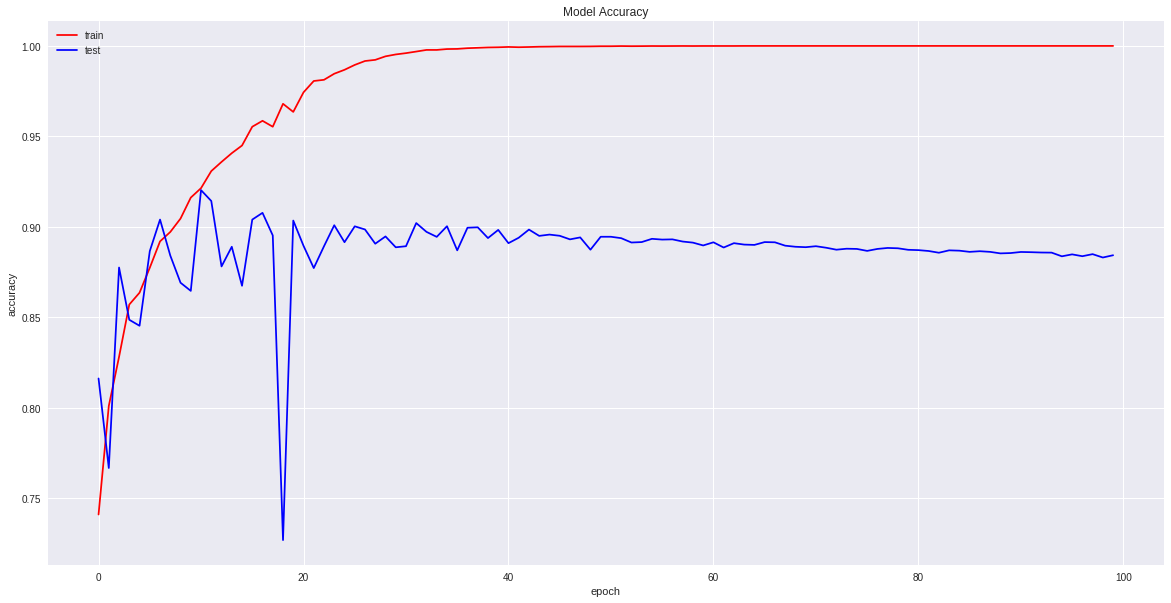

In [18]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1[2].history['acc'], color = 'r')
plt.plot(history_1[2].history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


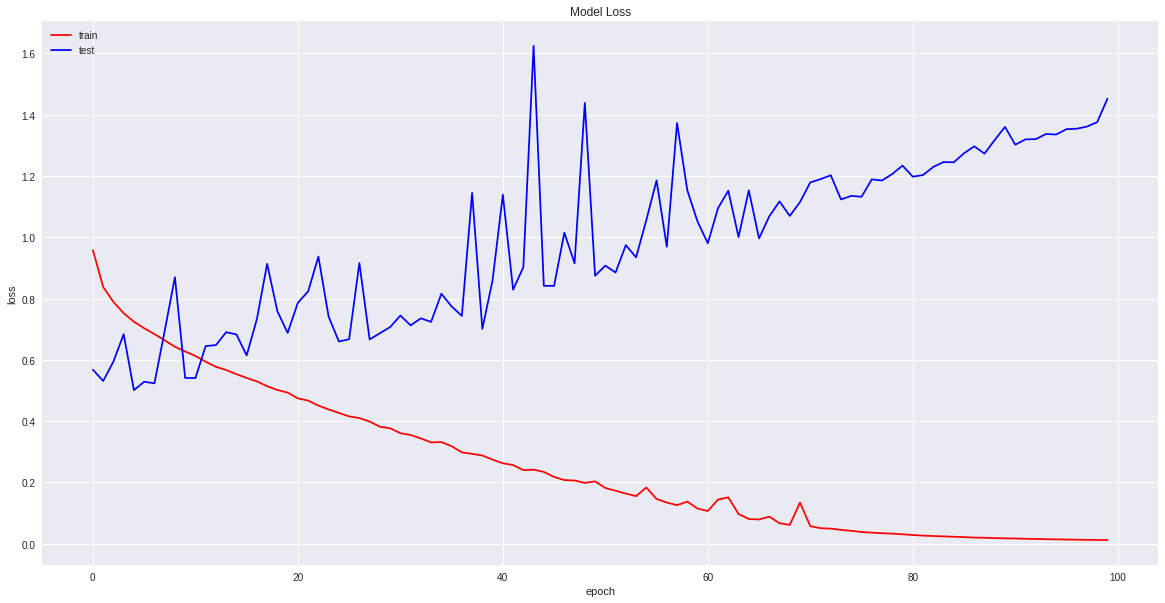

In [17]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1[2].history['loss'], color = 'r')
plt.plot(history_1[2].history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()